# Pokemon

Integrantes:  

Daniel Martínez  
Tomás Nieto

Link:

https://www.canva.com/design/DAGCJsYlzAI/nlUCQbIBufEjBtSK-0jrIA/watch?utm_content=DAGCJsYlzAI&utm_campaign=share_your_design&utm_medium=link&utm_source=shareyourdesignpanel

# 1.

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn_extra.cluster import KMedoids
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

In [2]:
#Cargar y verificar integridad de los datos. Realizar curación si corresponde.
data = pd.read_csv('Pokemon.csv')
data.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
#some values in type 2 are missing, so we will fill them with the value 'None'
data['Type 2'].fillna('None', inplace=True)

# 2.

In [4]:
#Graficar matriz de correlación y realizar un scatter_matrix con plotly.

fig = px.scatter_matrix(data, dimensions=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], color='Legendary')
fig.show()


In [5]:
'''sns.pairplot(data, hue='Legendary')
plt.show()'''

"sns.pairplot(data, hue='Legendary')\nplt.show()"

In [6]:
#total vs legendary, boxplot
fig = px.box(data, x='Legendary', y='Total')
fig.show()


In [7]:
#total of only legendaries vs generation, scatter plot
fig = px.scatter(data, x='Generation', y='Total', color='Legendary')
#average line for total
data_common = data[data['Legendary'] == False]
fig.add_scatter(x=np.arange(1, 7), y=[data_common[data_common['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total')
data_legendary = data[data['Legendary'] == True]
fig.add_scatter(x=np.arange(1, 7), y=[data_legendary[data_legendary['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total Legendary')

fig.show()



# K-MEAN

In [8]:
#K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
n_types = data['Type 1'].nunique()
n_types

18

In [10]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)
categorial_features


Index(['Type 1'], dtype='object')

In [11]:

distances_list = []
sillhouette_list = []

K = 80
for j in range(2, K):
    kmeans = KMeans(n_clusters=j, random_state=42)
    data_new['Cluster'] = kmeans.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data_new['Cluster'] == i]
        cluster_center = kmeans.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))

    
    #calculate sillhouette
    sillhouette_list.append(silhouette_score(data_scaled, data_new['Cluster']))
    
    mean_distance = total_distance / data.shape[0]
    distances_list.append(mean_distance)


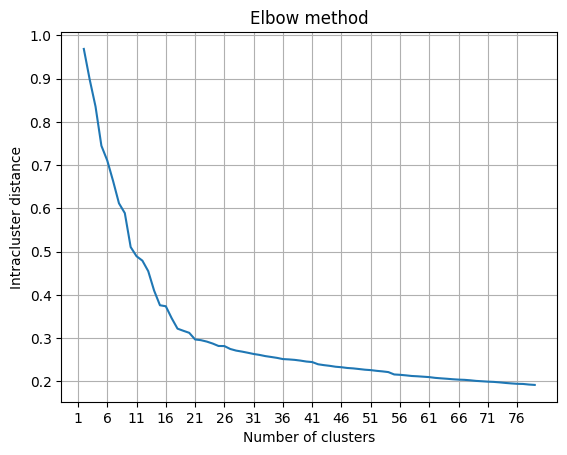

In [12]:
#plot elbow method

plt.plot(np.arange(2,K), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.xticks(np.arange(1,K,5))
plt.grid()
plt.title('Elbow method')
plt.show()


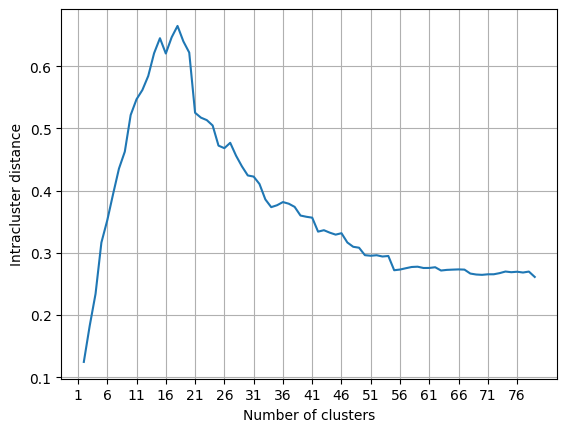

In [13]:
#plot sillhouette
plt.plot(np.arange(2,K), sillhouette_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.xticks(np.arange(1,K,5))
plt.grid()
plt.show()

In [14]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)
categorial_features

Index(['Type 1'], dtype='object')

In [15]:
# Set the number of clusters to 10
k = 18

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data_new['Cluster'] = kmeans.fit_predict(data_scaled)

In [16]:
data_new['Cluster'].unique()

array([ 2,  5,  1,  3,  0, 14,  6, 10, 16, 17,  4, 15,  8,  7, 12, 11,  9,
       13])

In [17]:
#for each cluster, create a radar plot
# Set the number of clusters to 10
k = 18

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data_new['Cluster'] = kmeans.fit_predict(data_scaled)

clusters = data_new['Cluster'].unique()
for cluster in sorted(clusters):
    fig = go.Figure()
    cluster_data = data_new[data_new['Cluster'] == cluster].drop('Cluster', axis=1)
    numerical_features = cluster_data.select_dtypes(include=['float64', 'int64']).columns
    cluster_data = cluster_data[numerical_features]
    radar_data = cluster_data.mean().reset_index()
    radar_data.columns = ['Stats', 'Values']

    fig = px.line_polar(radar_data, r='Values', theta='Stats', line_close=True, range_r=[0, 200], title=f'Cluster {cluster}, {cluster_data.shape[0]} Pokemons')
    fig.show()

clusters
    


array([ 2,  5,  1,  3,  0, 14,  6, 10, 16, 17,  4, 15,  8,  7, 12, 11,  9,
       13])

In [18]:
#Realizar un grafico scatter_matrix con plotly usando como parámetro color la variable clústeres.
fig = plt.figure(figsize=(10, 15))
#add scatter matrix to the figure
fig = px.scatter_matrix(data_new, dimensions=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], color='Cluster')
fig.update_layout(width=800, height=800)
fig.show()


<Figure size 1000x1500 with 0 Axes>

In [19]:
kmeans.cluster_centers_[:,:6]

array([[0.30029728, 0.3701048 , 0.24376417, 0.24900177, 0.20821186,
        0.38029155],
       [0.27977362, 0.37379344, 0.30198413, 0.35224185, 0.24056122,
        0.34836735],
       [0.26091114, 0.36872587, 0.29244444, 0.36684783, 0.24013605,
        0.32530612],
       [0.21906637, 0.35343629, 0.28984127, 0.23773292, 0.21163265,
        0.32334694],
       [0.27414007, 0.35922238, 0.27859649, 0.48045385, 0.31562239,
        0.43709273],
       [0.27127498, 0.43118503, 0.27897436, 0.42924331, 0.24862637,
        0.39681319],
       [0.23147817, 0.34643735, 0.27242424, 0.43490613, 0.25573593,
        0.45428571],
       [0.19045276, 0.30337838, 0.65888889, 0.24388587, 0.44702381,
        0.22142857],
       [0.24975394, 0.37179054, 0.33861111, 0.37686821, 0.26889881,
        0.33910714],
       [0.25908052, 0.45074106, 0.28989247, 0.3513324 , 0.23579109,
        0.40663594],
       [0.28654035, 0.49054054, 0.35486111, 0.25254755, 0.20357143,
        0.33660714],
       [0.32328459, 0

In [20]:
data_new.columns[1:-1]

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [21]:
data_scaled[:,:6]

array([[0.17322835, 0.23783784, 0.19555556, 0.29891304, 0.21428571,
        0.22857143],
       [0.23228346, 0.30810811, 0.25777778, 0.38043478, 0.28571429,
        0.31428571],
       [0.31102362, 0.41621622, 0.34666667, 0.48913043, 0.38095238,
        0.42857143],
       ...,
       [0.31102362, 0.56756757, 0.24444444, 0.76086957, 0.52380952,
        0.37142857],
       [0.31102362, 0.83783784, 0.24444444, 0.86956522, 0.52380952,
        0.42857143],
       [0.31102362, 0.56756757, 0.51111111, 0.65217391, 0.33333333,
        0.37142857]])

In [22]:
temp = pd.DataFrame(data_scaled[:,:6], columns=data_new.columns[1:-1])
temp['Cluster'] = data_new['Cluster']
temp

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,2
1,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,2
2,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,2
3,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,2
4,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,5
...,...,...,...,...,...,...,...
795,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,7
796,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,15
797,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,4
798,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,4


In [23]:
#sp attack vs hp, scatter plot
fig = px.scatter(temp, x='Sp. Atk', y='HP', color='Cluster')
#mark the cluster centers with a cross
for cluster in sorted(clusters):
    cluster_center = kmeans.cluster_centers_[cluster]
    fig.add_scatter(x=[cluster_center[3]], y=[cluster_center[0]], mode='markers', marker=dict(size=10, symbol='x', color='#0ce7f8'), name=f'Cluster {cluster} center')
fig.show()

# K-MEDIOD

In [24]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)
categorial_features

Index(['Type 1'], dtype='object')

In [25]:
K = 40

distances_list = []
sillhouette_list = []

for j in range(2, K):
    kmediod = KMedoids(n_clusters=j, random_state=42)
    data_new['Cluster'] = kmediod.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data_new['Cluster'] == i]
        cluster_center = kmediod.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))**2

    
    #calculate sillhouette
    sillhouette_list.append(silhouette_score(data_scaled, data_new['Cluster']))
    
    mean_distance = total_distance / data_new.shape[0]
    distances_list.append(mean_distance)

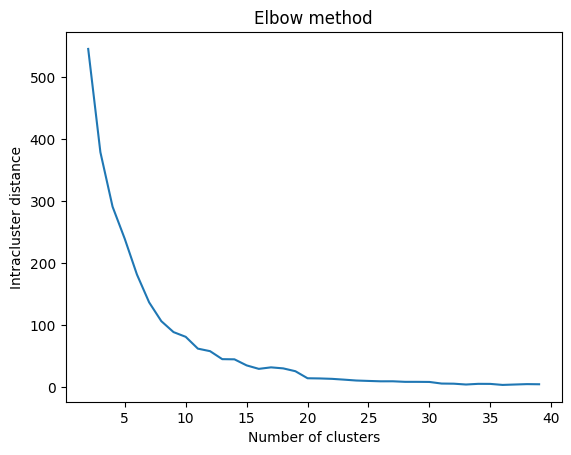

In [26]:
#plot elbow method
plt.plot(np.arange(2,K), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.title('Elbow method')
plt.show()


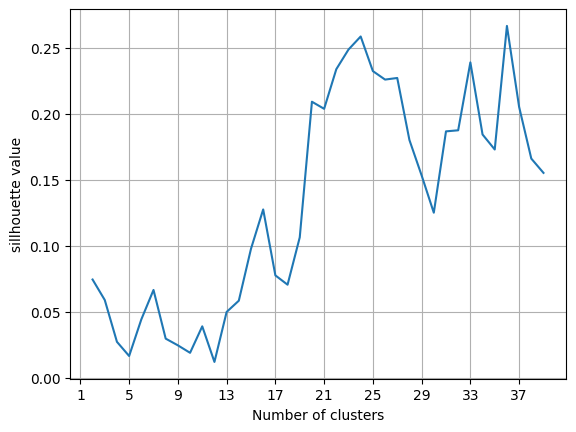

In [27]:
#plot sillhouette
plt.plot(np.arange(2,K), sillhouette_list)
plt.xlabel('Number of clusters')
plt.ylabel('sillhouette value')
plt.xticks(np.arange(1,K,K//10))
plt.grid()
plt.show()

In [28]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)
categorial_features

Index(['Type 1'], dtype='object')

In [29]:
k = 10

# Perform KMeans clustering
kmediods = KMedoids(n_clusters=k, random_state=42)
data_new['Cluster'] = kmediods.fit_predict(data_scaled)

clusters = data_new['Cluster'].unique()
for cluster in sorted(clusters):
    fig = go.Figure()
    cluster_data = data_new[data_new['Cluster'] == cluster].drop('Cluster', axis=1)
    numerical_features = cluster_data.select_dtypes(include=['float64', 'int64']).columns
    cluster_data = cluster_data[numerical_features]
    radar_data = cluster_data.mean().reset_index()
    radar_data.columns = ['Stats', 'Values']

    fig = px.line_polar(radar_data, r='Values', theta='Stats', line_close=True, range_r=[0, 200], title=f'Cluster {cluster}, {cluster_data.shape[0]} Pokemons')
    fig.show()

clusters

array([7, 6, 4, 2, 0, 5, 1, 9, 3, 8], dtype=int64)

In [30]:
#Realizar un grafico scatter_matrix con plotly usando como parámetro color la variable clústeres.
fig = plt.figure(figsize=(10, 15))
#add scatter matrix to the figure
fig = px.scatter_matrix(data_new, dimensions=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], color='Cluster')
fig.update_layout(width=800, height=800)
fig.show()

<Figure size 1000x1500 with 0 Axes>

In [31]:
temp = pd.DataFrame(data_scaled[:,:6], columns=data_new.columns[1:-1])
temp['Cluster'] = data_new['Cluster']
temp

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,7
1,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,7
2,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,6
3,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,6
4,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,4
...,...,...,...,...,...,...,...
795,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,5
796,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,5
797,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,2
798,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,6


In [32]:
#sp attack vs hp, scatter plot
fig = px.scatter(temp, x='Sp. Atk', y='HP', color='Cluster')
#mark the cluster centers with a cross
for cluster in sorted(clusters):
    cluster_center = kmediods.cluster_centers_[cluster]
    fig.add_scatter(x=[cluster_center[3]], y=[cluster_center[0]], mode='markers', marker=dict(size=10, symbol='x', color='#0ce7f8'), name=f'Cluster {cluster} center')
fig.show()

# K-MEDIAN

In [33]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)
categorial_features

Index(['Type 1'], dtype='object')

In [34]:
K = 80

distances_list = []
sillhouette_list = []

for j in range(2, K):
    kmediod = KMedoids(n_clusters=j, random_state=42)
    data_new['Cluster'] = kmediod.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data_new['Cluster'] == i]
        cluster_center = kmediod.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))

    
    #calculate sillhouette
    sillhouette_list.append(silhouette_score(data_scaled, data_new['Cluster']))
    
    mean_distance = total_distance / data_new.shape[0]
    distances_list.append(mean_distance)

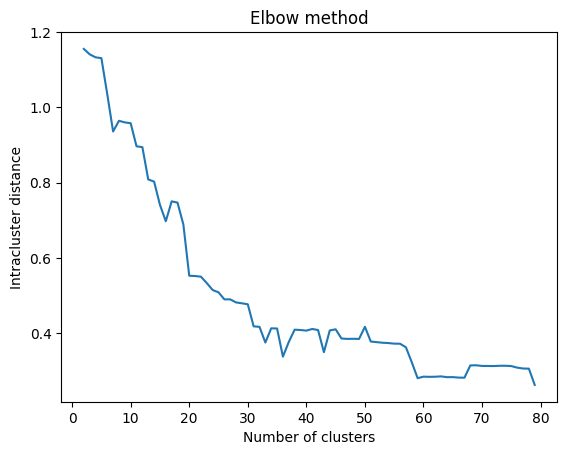

In [35]:
#plot elbow method
plt.plot(np.arange(2,K), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.title('Elbow method')
plt.show()

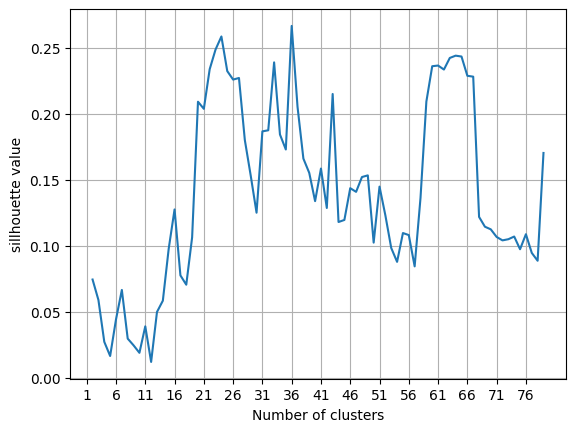

In [36]:
#plot sillhouette
plt.plot(np.arange(2,K), sillhouette_list)
plt.xlabel('Number of clusters')
plt.ylabel('sillhouette value')
plt.xticks(np.arange(1,K,5))
plt.grid()
plt.show()

In [37]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)
categorial_features

Index(['Type 1'], dtype='object')

In [38]:
k = 20

# Perform KMeans clustering
kmediods = KMedoids(n_clusters=k, random_state=42)
data_new['Cluster'] = kmediods.fit_predict(data_scaled)

clusters = data_new['Cluster'].unique()
for cluster in sorted(clusters):
    fig = go.Figure()
    cluster_data = data_new[data_new['Cluster'] == cluster].drop('Cluster', axis=1)
    numerical_features = cluster_data.select_dtypes(include=['float64', 'int64']).columns
    cluster_data = cluster_data[numerical_features]
    radar_data = cluster_data.mean().reset_index()
    radar_data.columns = ['Stats', 'Values']

    fig = px.line_polar(radar_data, r='Values', theta='Stats', line_close=True, range_r=[0, 200], title=f'Cluster {cluster}, {cluster_data.shape[0]} Pokemons')
    fig.show()

clusters

array([ 7,  6, 11, 12, 14, 18,  0, 19,  4, 16,  8,  9, 17,  3,  2,  5,  1,
       13, 10, 15], dtype=int64)

In [39]:
#Realizar un grafico scatter_matrix con plotly usando como parámetro color la variable clústeres.
fig = plt.figure(figsize=(10, 15))
#add scatter matrix to the figure
fig = px.scatter_matrix(data_new, dimensions=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], color='Cluster')
fig.update_layout(width=800, height=800)
fig.show()

<Figure size 1000x1500 with 0 Axes>

In [40]:
temp = pd.DataFrame(data_scaled[:,:6], columns=data_new.columns[1:-1])
temp['Cluster'] = data_new['Cluster']
temp

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,7
1,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,7
2,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,6
3,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,6
4,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,11
...,...,...,...,...,...,...,...
795,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,13
796,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,13
797,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,15
798,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,15


In [41]:
#sp attack vs hp, scatter plot
fig = px.scatter(temp, x='Sp. Atk', y='HP', color='Cluster')
#mark the cluster centers with a cross
for cluster in sorted(clusters):
    cluster_center = kmediods.cluster_centers_[cluster]
    fig.add_scatter(x=[cluster_center[3]], y=[cluster_center[0]], mode='markers', marker=dict(size=10, symbol='x', color='#0ce7f8'), name=f'Cluster {cluster} center')
fig.show()